In [131]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

In [132]:
df = pd.read_csv("vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Dropping entries that lack release Year or Publisher

In [134]:
drop_idx = df[(df.Year.isna()) | (df.Publisher.isna())].index

df.drop(drop_idx, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [135]:
df['Publisher'] = df.Publisher.apply(lambda x: 'Nintendo' if x == 'Nintendo' else 'Other')

In [136]:
min_value = df.Publisher.value_counts()[-1]


df_other = df[df.Publisher != 'Nintendo'].sample(n=min_value)
df_nin = df[df.Publisher == 'Nintendo'].sample(frac=1)

df_fin = pd.concat([df_nin, df_other])

df_fin = df_fin.sample(frac=1)
df_fin

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2540,2542,The Legend of Zelda: Four Swords Adventures,GC,2004.0,Action,Nintendo,0.63,0.16,0.00,0.02,0.81
4852,4854,Wii Sports Club,WiiU,2014.0,Sports,Nintendo,0.19,0.14,0.04,0.03,0.40
8155,8157,Mobile Suit Gundam Seed Destiny: Generation of...,PS2,2005.0,Action,Other,0.00,0.00,0.18,0.00,0.18
2357,2359,Grand Theft Auto IV,PC,2008.0,Action,Other,0.01,0.79,0.00,0.08,0.88
444,445,Personal Trainer: Cooking,DS,2006.0,Misc,Nintendo,0.91,1.00,1.03,0.17,3.12
...,...,...,...,...,...,...,...,...,...,...,...
316,317,Flash Focus: Vision Training in Minutes a Day,DS,2007.0,Misc,Nintendo,0.87,1.57,1.05,0.35,3.84
443,444,Star Wars Episode I Racer,N64,1999.0,Racing,Nintendo,2.31,0.62,0.14,0.04,3.12
16102,16105,Tobidase! Kagaku-kun Chikyuu Daitanken! Nazo n...,DS,2011.0,Misc,Other,0.00,0.00,0.01,0.00,0.01
4999,5001,Naruto Shippuden: Ultimate Ninja Heroes 3,PSP,2009.0,Fighting,Other,0.13,0.04,0.19,0.03,0.38


In [137]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [138]:
model = Sequential()

model.add(layers.Input((5)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(df.Publisher.unique()), activation='softmax'))


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'] )

In [139]:
x = df_fin.iloc[:,6:]
y = pd.get_dummies(df_fin.Publisher, dtype='int')

In [140]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [141]:
history = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=20,batch_size=64)

Epoch 1/20
16/16 [==============================] - 1s 13ms/step - loss: 0.6505 - accuracy: 0.6191 - val_loss: 0.6103 - val_accuracy: 0.7225
Epoch 2/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6101 - accuracy: 0.7331 - val_loss: 0.5846 - val_accuracy: 0.7464
Epoch 3/20
16/16 [==============================] - 0s 3ms/step - loss: 0.5870 - accuracy: 0.7433 - val_loss: 0.5738 - val_accuracy: 0.7488
Epoch 4/20
16/16 [==============================] - 0s 3ms/step - loss: 0.5687 - accuracy: 0.7567 - val_loss: 0.5506 - val_accuracy: 0.7632
Epoch 5/20
16/16 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.7731 - val_loss: 0.5330 - val_accuracy: 0.7703
Epoch 6/20
16/16 [==============================] - 0s 3ms/step - loss: 0.5305 - accuracy: 0.7669 - val_loss: 0.5265 - val_accuracy: 0.7464
Epoch 7/20
16/16 [==============================] - 0s 3ms/step - loss: 0.5137 - accuracy: 0.7782 - val_loss: 0.5156 - val_accuracy: 0.7608
Epoch 8/20
16/16 [=

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

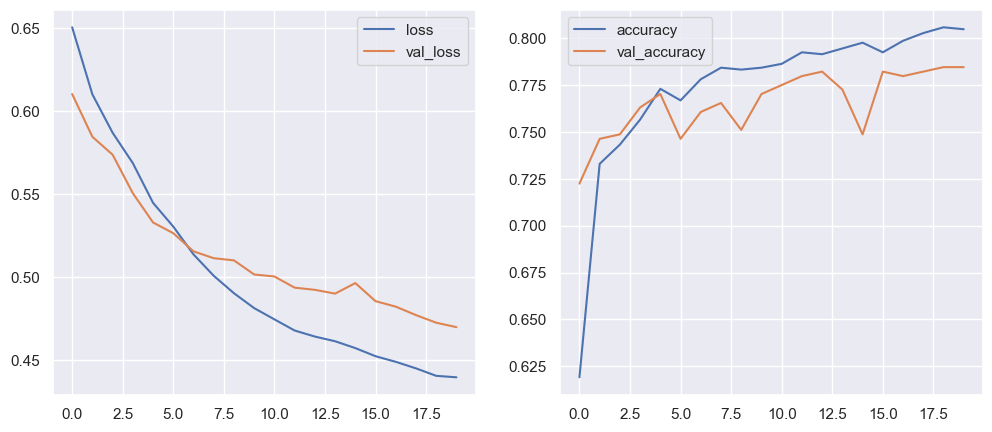

In [143]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])



plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])


In [144]:
from sklearn.metrics import confusion_matrix

preds = np.argmax(model.predict(x_test), axis = 1)

trues = np.argmax(y_test, axis = 1)

14/14 [==============================] - 0s 1ms/step


In [145]:
cm = confusion_matrix(preds, trues)

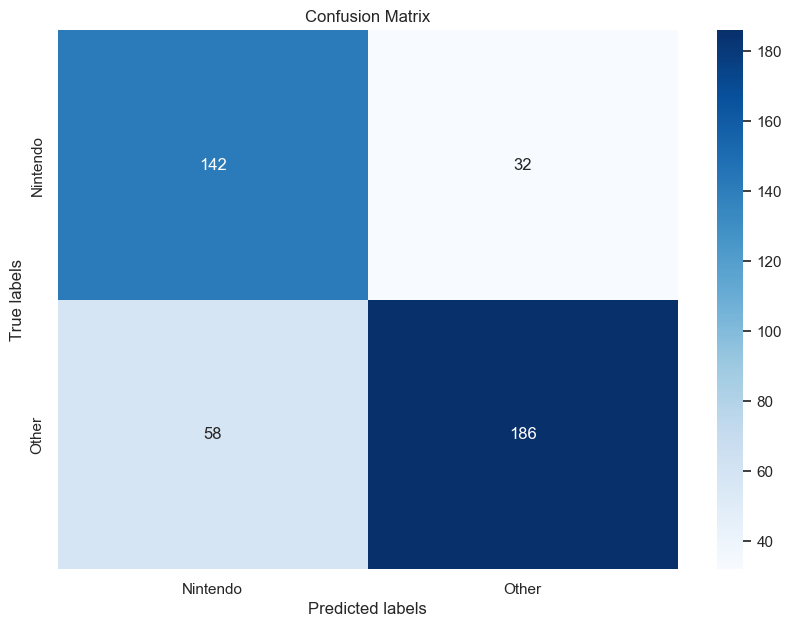

In [146]:
classes = ['Nintendo', 'Other']

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()